# Gantt-Style Thinking: Visualizing Schedules Over Time

This notebook demonstrates **Gantt charts** and how to use visual thinking to understand and evaluate schedules.

Understanding Gantt-style thinking is critical because:
- Gantt charts show tasks, durations, dependencies, and timing all in one view
- Visual representations make complex schedules easier to understand
- Gantt charts help identify conflicts, dependencies, and critical paths
- Visual thinking speeds schedule evaluation and communication


## Key Concepts

**Gantt Charts** are visual representations of schedules:
- Time on horizontal axis (flows left to right)
- Tasks on vertical axis
- Each task shown as a horizontal bar
- Bar length = task duration
- Bar position = when task occurs

**Reading Gantt Charts**:
- Left edge of bar = task start time
- Right edge of bar = task finish time
- Arrows between bars = dependencies
- Critical path = longest sequence of dependent tasks

**Using Gantt Thinking for Evaluation**:
- See conflicts and overlaps immediately
- Identify dependency violations visually
- Understand schedule flexibility (slack)
- Communicate schedules to stakeholders

**Critical insight**: Visual thinking helps you understand schedules faster and spot problems that might be missed in numerical formats.


## Scenario: Project Schedule Visualization

You have a project with multiple tasks that have dependencies. You want to visualize the schedule using a Gantt chart to understand timing, dependencies, and the critical path.

**Tasks**:
- Design (5 days)
- Development (10 days, depends on Design)
- Testing (5 days, depends on Development)
- Documentation (3 days, depends on Design)
- Deployment (2 days, depends on Testing and Documentation)


## Step 1: Install Required Packages (Colab)


In [1]:
%pip install matplotlib pandas numpy -q



[notice] A new release of pip is available: 24.2 -> 25.3
[notice] To update, run: pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.


## Step 2: Import Libraries


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from datetime import datetime, timedelta


## Step 3: Define Project Tasks and Schedule


In [3]:
# Define tasks with durations and start times
tasks = [
    {'Task': 'Design', 'Start': 0, 'Duration': 5, 'Dependencies': []},
    {'Task': 'Development', 'Start': 5, 'Duration': 10, 'Dependencies': ['Design']},
    {'Task': 'Testing', 'Start': 15, 'Duration': 5, 'Dependencies': ['Development']},
    {'Task': 'Documentation', 'Start': 5, 'Duration': 3, 'Dependencies': ['Design']},
    {'Task': 'Deployment', 'Start': 20, 'Duration': 2, 'Dependencies': ['Testing', 'Documentation']}
]

tasks_df = pd.DataFrame(tasks)
tasks_df['Finish'] = tasks_df['Start'] + tasks_df['Duration']

print("PROJECT TASKS:")
print("=" * 70)
display(tasks_df[['Task', 'Start', 'Duration', 'Finish', 'Dependencies']])

# Identify critical path (longest path)
critical_path = ['Design', 'Development', 'Testing', 'Deployment']
print(f"\nCritical Path: {' → '.join(critical_path)}")
print(f"Total Duration: {tasks_df[tasks_df['Task'] == 'Deployment']['Finish'].values[0]} days")


PROJECT TASKS:


,Task,Start,Duration,Finish,Dependencies
0,Design,0,5,5,[]
1,Development,5,10,15,[Design]
2,Testing,15,5,20,[Development]
3,Documentation,5,3,8,[Design]
4,Deployment,20,2,22,"[Testing, Documentation]"



Critical Path: Design → Development → Testing → Deployment
Total Duration: 22 days


## Step 4: Create Gantt Chart

Let's visualize the schedule as a Gantt chart:


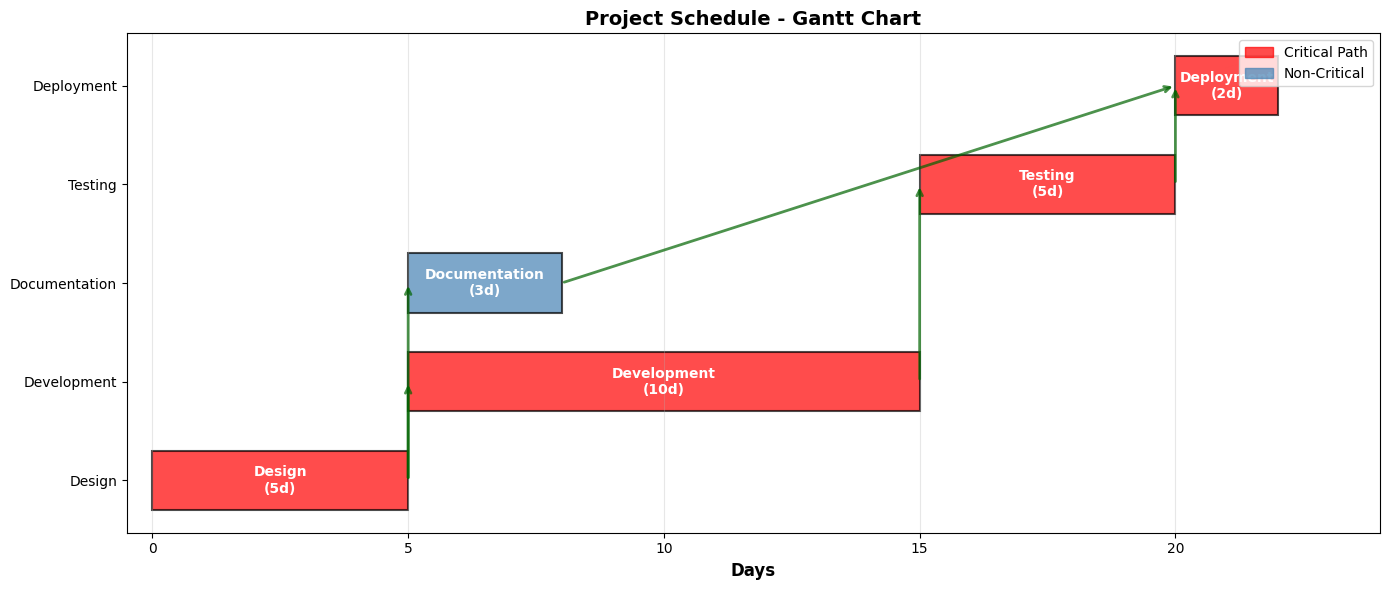


Gantt Chart Elements:
  - Horizontal bars: Tasks (length = duration, position = timing)
  - Red bars: Critical path tasks (any delay delays project)
  - Blue bars: Non-critical tasks (have slack)
  - Green arrows: Dependencies (predecessor → successor)


In [4]:
fig, ax = plt.subplots(figsize=(14, 6))

# Sort tasks by start time for better visualization
tasks_sorted = tasks_df.sort_values('Start')

# Create horizontal bars for each task
y_pos = range(len(tasks_sorted))

for idx, (i, row) in enumerate(tasks_sorted.iterrows()):
    task = row['Task']
    start = row['Start']
    duration = row['Duration']
    
    # Color: red for critical path, blue for non-critical
    color = 'red' if task in critical_path else 'steelblue'
    
    # Draw task bar
    ax.barh(idx, duration, left=start, color=color, alpha=0.7, 
            edgecolor='black', linewidth=1.5, height=0.6)
    
    # Add task label
    ax.text(start + duration/2, idx, f"{task}\n({duration}d)", 
            ha='center', va='center', fontweight='bold', 
            fontsize=10, color='white')

# Draw dependency arrows
dependencies_map = {
    ('Design', 'Development'): (tasks_df[tasks_df['Task'] == 'Design']['Finish'].values[0],
                                tasks_df[tasks_df['Task'] == 'Development']['Start'].values[0]),
    ('Design', 'Documentation'): (tasks_df[tasks_df['Task'] == 'Design']['Finish'].values[0],
                                  tasks_df[tasks_df['Task'] == 'Documentation']['Start'].values[0]),
    ('Development', 'Testing'): (tasks_df[tasks_df['Task'] == 'Development']['Finish'].values[0],
                                tasks_df[tasks_df['Task'] == 'Testing']['Start'].values[0]),
    ('Testing', 'Deployment'): (tasks_df[tasks_df['Task'] == 'Testing']['Finish'].values[0],
                               tasks_df[tasks_df['Task'] == 'Deployment']['Start'].values[0]),
    ('Documentation', 'Deployment'): (tasks_df[tasks_df['Task'] == 'Documentation']['Finish'].values[0],
                                     tasks_df[tasks_df['Task'] == 'Deployment']['Start'].values[0])
}

for (pred, succ), (pred_finish, succ_start) in dependencies_map.items():
    pred_idx = tasks_sorted[tasks_sorted['Task'] == pred].index[0]
    succ_idx = tasks_sorted[tasks_sorted['Task'] == succ].index[0]
    
    pred_y = list(tasks_sorted.index).index(pred_idx)
    succ_y = list(tasks_sorted.index).index(succ_idx)
    
    # Draw arrow
    ax.annotate('', xy=(succ_start, succ_y), xytext=(pred_finish, pred_y),
                arrowprops=dict(arrowstyle='->', lw=2, color='darkgreen', alpha=0.7))

# Formatting
ax.set_yticks(y_pos)
ax.set_yticklabels(tasks_sorted['Task'])
ax.set_xlabel('Days', fontsize=12, fontweight='bold')
ax.set_title('Project Schedule - Gantt Chart', fontsize=14, fontweight='bold')
ax.grid(True, alpha=0.3, axis='x')
ax.set_xlim(-0.5, tasks_df['Finish'].max() + 2)

# Legend
critical_patch = mpatches.Patch(color='red', alpha=0.7, label='Critical Path')
non_critical_patch = mpatches.Patch(color='steelblue', alpha=0.7, label='Non-Critical')
ax.legend(handles=[critical_patch, non_critical_patch], loc='upper right')

plt.tight_layout()
plt.show()

print("\nGantt Chart Elements:")
print("  - Horizontal bars: Tasks (length = duration, position = timing)")
print("  - Red bars: Critical path tasks (any delay delays project)")
print("  - Blue bars: Non-critical tasks (have slack)")
print("  - Green arrows: Dependencies (predecessor → successor)")


In [5]:
# Example: What if we try to start Development before Design finishes?
print("USING GANTT THINKING TO IDENTIFY PROBLEMS:")
print("=" * 70)

print("\nProblem 1: Dependency Violation")
print("-" * 70)
print("If Development starts on Day 3 (before Design finishes on Day 5):")
print("  - In Gantt chart: Development bar would overlap with Design bar")
print("  - Arrow from Design to Development would point backwards")
print("  - Visual conflict is immediately obvious")
print("  → This is INFEASIBLE")

print("\nProblem 2: Resource Conflict")
print("-" * 70)
print("If two tasks requiring the same resource overlap:")
print("  - In Gantt chart: Bars would overlap on timeline")
print("  - Visual overlap shows the conflict immediately")
print("  → Need to adjust schedule or add resources")

print("\nProblem 3: Critical Path Identification")
print("-" * 70)
print("Critical path is visually obvious:")
print("  - Longest sequence of connected tasks")
print("  - Tasks with no slack (cannot be delayed)")
print("  - Usually highlighted in different color")
print("  → Any delay on critical path delays entire project")

print("\nKey Insight:")
print("  - Gantt charts make problems VISUAL and OBVIOUS")
print("  - Much easier to spot issues than in numerical formats")
print("  - Helps communicate problems to stakeholders")


USING GANTT THINKING TO IDENTIFY PROBLEMS:

Problem 1: Dependency Violation
----------------------------------------------------------------------
If Development starts on Day 3 (before Design finishes on Day 5):
  - In Gantt chart: Development bar would overlap with Design bar
  - Arrow from Design to Development would point backwards
  - Visual conflict is immediately obvious
  → This is INFEASIBLE

Problem 2: Resource Conflict
----------------------------------------------------------------------
If two tasks requiring the same resource overlap:
  - In Gantt chart: Bars would overlap on timeline
  - Visual overlap shows the conflict immediately
  → Need to adjust schedule or add resources

Problem 3: Critical Path Identification
----------------------------------------------------------------------
Critical path is visually obvious:
  - Longest sequence of connected tasks
  - Tasks with no slack (cannot be delayed)
  - Usually highlighted in different color
  → Any delay on critical

## Summary: Gantt-Style Thinking

**Gantt Charts** visualize schedules:
- Time flows horizontally (left to right)
- Tasks shown as horizontal bars
- Bar length = duration, position = timing
- Dependencies shown as arrows

**Reading Gantt Charts**:
- Left edge = start time, right edge = finish time
- Arrows show dependencies
- Critical path is longest sequence
- Overlaps show conflicts

**Using Gantt Thinking**:
- See conflicts and problems immediately
- Identify dependency violations visually
- Understand schedule flexibility
- Communicate schedules effectively

**Practical Implications**:
- Use Gantt charts to visualize complex schedules
- Visual thinking speeds evaluation
- Gantt charts help communicate with stakeholders
- Problems are easier to spot visually than numerically
